# Capital Bike Sharing Project


### Importing libraries, read csf file, and data preprocessing and cleaning

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Load the dataset
df_hr = pd.read_csv('CBS_Hourly.csv',low_memory=False)
df_day = pd.read_csv('CBS_Daily.csv',low_memory=False)
df_full = pd.read_csv('CBS_Full.csv',low_memory=False)

df_hr.head(50) 

df_hr.info()    
df_day.info()
df_hr.describe()
df_day.describe()
df_hr.tail(50) 
df_hr.duplicated().sum()



df_hr_n = df_hr.rename(columns={'Casual':'casual', 'Date':'date',	'Hour':'hour','Member':'member','Total_rides':'total_rides','relativehumidity_2m (%)': 're_humidity', 'temperature_2m (°C)':'tempt_2m','weathercode (wmo code)':'wmo_code','windspeed_10m (km/h)':'wind_speed'})
df_hr_n


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26269 non-null  float64
 1   Date                     26280 non-null  object 
 2   Hour                     26280 non-null  int64  
 3   Member                   26269 non-null  float64
 4   Total_rides              26269 non-null  float64
 5   relativehumidity_2m (%)  26280 non-null  int64  
 6   temperature_2m (°C)      26280 non-null  float64
 7   weathercode (wmo code)   26280 non-null  int64  
 8   windspeed_10m (km/h)     26280 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cas

,casual,date,hour,member,total_rides,re_humidity,tempt_2m,wmo_code,wind_speed
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9
...,...,...,...,...,...,...,...,...,...
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7


### data cleaning for hourly data


In [60]:
df_hr_n

,casual,date,hour,member,total_rides,re_humidity,tempt_2m,wmo_code,wind_speed
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9
...,...,...,...,...,...,...,...,...,...
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7


In [61]:
df_hr_n
df_hr_n.isnull().sum()
df_hr_n = df_hr_n.dropna(subset=['casual', 'member', 'total_rides']) 
df_hr_n.isnull().sum() 
# df_hr_n.isnull() 

# df_hr_n['Date'] = pd.to_datetime(df_hr_n['Date'], errors='coerce') 
df_hr_n.loc[:, 'date'] = pd.to_datetime(df_hr_n['date'], errors='coerce').dt.date
df_hr_n.isnull().sum()  
df_hr_n.duplicated().sum() 
df_hr_n

,casual,date,hour,member,total_rides,re_humidity,tempt_2m,wmo_code,wind_speed
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9
...,...,...,...,...,...,...,...,...,...
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7


### Data cleaning for daily data 

In [62]:


# df_day_n 
df_day.duplicated().sum()
df_day_n = df_day.rename(columns={	'Casual':'casual',	'Date': 'date',	'Member':'member',	'Total_rides': 'total_rides', 'apparent_temperature_mean (°C)':'apt_tempt_mean','temperature_2m_mean (°C)': 'tempt_2m_mean','weathercode (wmo code)':'wmo_code','windspeed_10m_max (km/h)':'wind_speed' })
df_day_n.isnull().sum()   
df_day_n.duplicated().sum()

df_day_clean= df_day_n.loc[:, 'date'] = pd.to_datetime(df_day_n['date'], errors='coerce').dt.date
df_day_clean.isnull().sum()
df_day_clean.duplicated().sum() 
df_day_clean = df_day_n.dropna(subset=['apt_tempt_mean', 'tempt_2m_mean', 'wmo_code', 'wind_speed', 'total_rides', 'casual', 'member', 'date'])

df_day_clean.isnull().sum() 
df_day_clean 

,casual,date,member,total_rides,apt_tempt_mean,tempt_2m_mean,wmo_code,wind_speed
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2
...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8


### Day Type Vs Total Rides


/var/folders/tj/8m4f2hl545d85f9bhjg24z500000gn/T/ipykernel_21487/4229206394.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rides_by_day_type = df_day_clean.groupby('day_type')['total_rides'].sum().reindex(


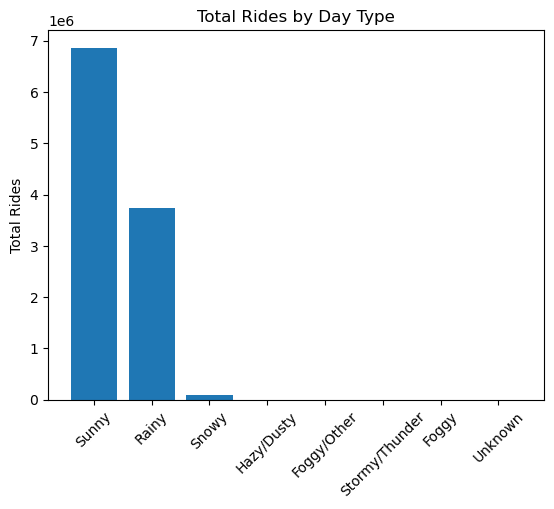

In [63]:
import matplotlib.pyplot as plt
categories = [
    'Sunny','Hazy/Dusty','Foggy/Other','Rainy',
    'Stormy/Thunder','Foggy','Snowy','Unknown'
]

# 2. Create categorical column
df_day_clean['day_type'] = pd.Categorical(
    df_day_clean['wmo_code'].apply(lambda value:
        'Sunny' if value <= 3 else
        'Hazy/Dusty' if value <= 9 else
        'Foggy/Other' if value <= 19 else
        'Rainy' if (20 <= value <= 29) or (50 <= value <= 69) else
        'Stormy/Thunder' if (30 <= value <= 35) or (80 <= value <= 99) else
        'Foggy' if 40 <= value <= 49 else
        'Snowy' if 70 <= value <= 79 else
        'Unknown'
    ),
    categories=categories,
    ordered=True
)

# Aggregate sum of rides per day_type
rides_by_day_type = df_day_clean.groupby('day_type')['total_rides'].sum().reindex(
    ['Sunny','Rainy','Snowy','Hazy/Dusty','Foggy/Other','Stormy/Thunder','Foggy','Unknown']
)

fig, ax = plt.subplots()
ax.bar(range(len(rides_by_day_type)), rides_by_day_type.values)
ax.set_xticks(range(len(rides_by_day_type)))
ax.set_xticklabels(rides_by_day_type.index, rotation=45)
plt.title('Total Rides by Day Type')
plt.ylabel('Total Rides')
plt.show()


### Weather Conditions Vs Total Rides

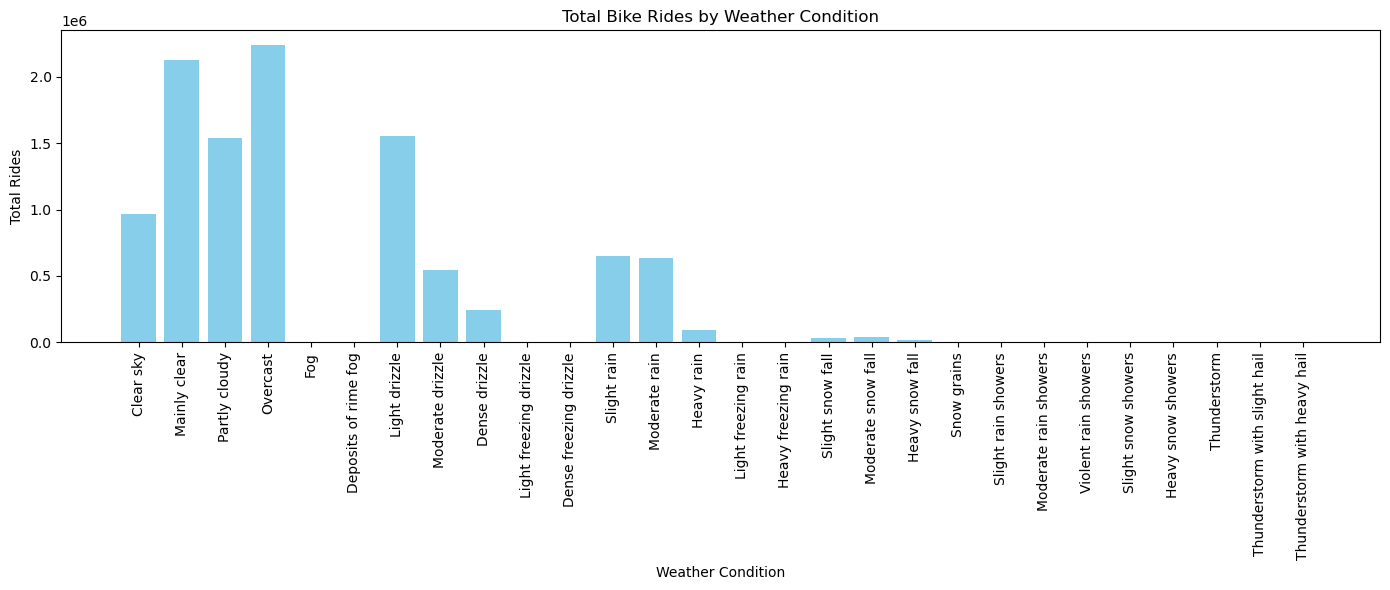

In [64]:
weather_code_map = {
    0: 'Clear sky',
    1: 'Mainly clear',
    2: 'Partly cloudy',
    3: 'Overcast',
    45: 'Fog',
    48: 'Deposits of rime fog',
    51: 'Light drizzle',
    53: 'Moderate drizzle',
    55: 'Dense drizzle',
    56: 'Light freezing drizzle',
    57: 'Dense freezing drizzle',
    61: 'Slight rain',
    63: 'Moderate rain',
    65: 'Heavy rain',
    66: 'Light freezing rain',
    67: 'Heavy freezing rain',
    71: 'Slight snow fall',
    73: 'Moderate snow fall',
    75: 'Heavy snow fall',
    77: 'Snow grains',
    80: 'Slight rain showers',
    81: 'Moderate rain showers',
    82: 'Violent rain showers',
    85: 'Slight snow showers',
    86: 'Heavy snow showers',
    95: 'Thunderstorm',
    96: 'Thunderstorm with slight hail',
    99: 'Thunderstorm with heavy hail'
}

# Map the wmo_code to descriptions
df_day_clean['weather_desc'] = df_day_clean['wmo_code'].map(weather_code_map)
df_day_clean['weather_desc'] = df_day_clean['wmo_code'].map(weather_code_map).fillna('Unknown')
rides_by_weather = df_day_clean.groupby('weather_desc', as_index=True)['total_rides'].sum()
weather_order = [weather_code_map[k] for k in weather_code_map.keys()]
rides_by_weather = rides_by_weather.reindex(weather_order).fillna(0)

plt.figure(figsize=(14,6))
plt.bar(rides_by_weather.index, rides_by_weather.values, color='skyblue')
plt.xticks(rotation=90)  # rotate for readability
plt.title('Total Bike Rides by Weather Condition')
plt.ylabel('Total Rides')
plt.xlabel('Weather Condition')
plt.tight_layout()
plt.show()


In [65]:
df_day_clean 

,casual,date,member,total_rides,apt_tempt_mean,tempt_2m_mean,wmo_code,wind_speed,day_type,weather_desc
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,Rainy,Moderate rain
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,Rainy,Slight rain
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,Rainy,Moderate rain
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,Sunny,Overcast
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,Rainy,Light drizzle
...,...,...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1,Snowy,Slight snow fall
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8,Sunny,Clear sky
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5,Sunny,Mainly clear
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8,Sunny,Mainly clear


### Total Bike Rides by Day Type

/var/folders/tj/8m4f2hl545d85f9bhjg24z500000gn/T/ipykernel_21487/2569738810.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rides_by_day_type = df_day_clean.groupby('day_type')['total_rides'].sum().reindex(categories, fill_value=0)


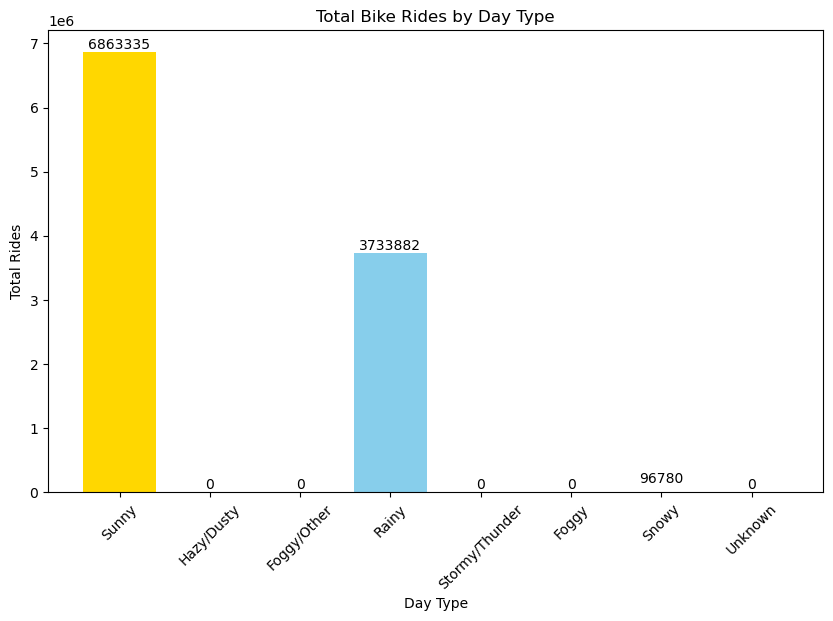

In [66]:
import matplotlib.pyplot as plt

# 1. Define categories
categories = [
    'Sunny','Hazy/Dusty','Foggy/Other','Rainy',
    'Stormy/Thunder','Foggy','Snowy','Unknown'
]

# 2. Create categorical column
df_day_clean['day_type'] = pd.Categorical(
    df_day_clean['wmo_code'].apply(lambda value:
        'Sunny' if value <= 3 else
        'Hazy/Dusty' if value <= 9 else
        'Foggy/Other' if value <= 19 else
        'Rainy' if (20 <= value <= 29) or (50 <= value <= 69) else
        'Stormy/Thunder' if (30 <= value <= 35) or (80 <= value <= 99) else
        'Foggy' if 40 <= value <= 49 else
        'Snowy' if 70 <= value <= 79 else
        'Unknown'
    ),
    categories=categories,
    ordered=True
)

# 3. Aggregate total rides per category and ensure all categories appear
rides_by_day_type = df_day_clean.groupby('day_type')['total_rides'].sum().reindex(categories, fill_value=0)


colors = ['gold', 'tan', 'gray', 'skyblue', 'purple', 'lightgray', 'white', 'black']

fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(rides_by_day_type.index, rides_by_day_type.values, color=colors)

# Add value labels on bars
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
            f'{int(bar.get_height())}', ha='center', va='bottom')

plt.title('Total Bike Rides by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.show()


In [67]:
#data cleaning 
df_hr_clean  = df_hr_n.loc[:, 'date'] = pd.to_datetime(df_hr_n['date'], errors='coerce').dt.date
df_hr_clean.isnull().sum()  
df_hr_clean.duplicated().sum()
df_hr_clean = df_hr_n.dropna(subset=['casual', 'member', 'total_rides', 're_humidity', 'tempt_2m', 'wmo_code', 'wind_speed', 'date', 'hour'])
df_hr_clean 
df_hr_clean.isnull().sum()
df_hr_clean.duplicated().sum()
df_hr_clean   
df_hr_clean = df_hr_n.dropna(subset=['casual', 'member', 'total_rides'])    
df_hr_clean.isnull().sum()   
df_hr_clean.duplicated().sum() 
df_hr_clean

# df_day_clean.isnull().sum() 



,casual,date,hour,member,total_rides,re_humidity,tempt_2m,wmo_code,wind_speed
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9
...,...,...,...,...,...,...,...,...,...
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7


### Boxplot 

Text(0.5, 1.0, 'Total Rides by Weather Code')

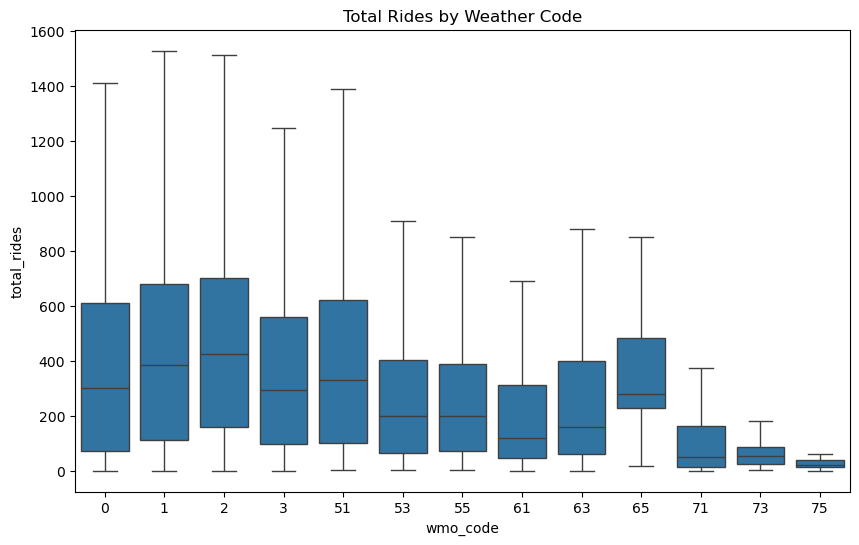

In [68]:
#data visualization for df_hr using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hr_clean, x='wmo_code', y='total_rides',showfliers=False)        
plt.title('Total Rides by Weather Code')


Text(0.5, 1.0, 'Total Rides by Weather Code')

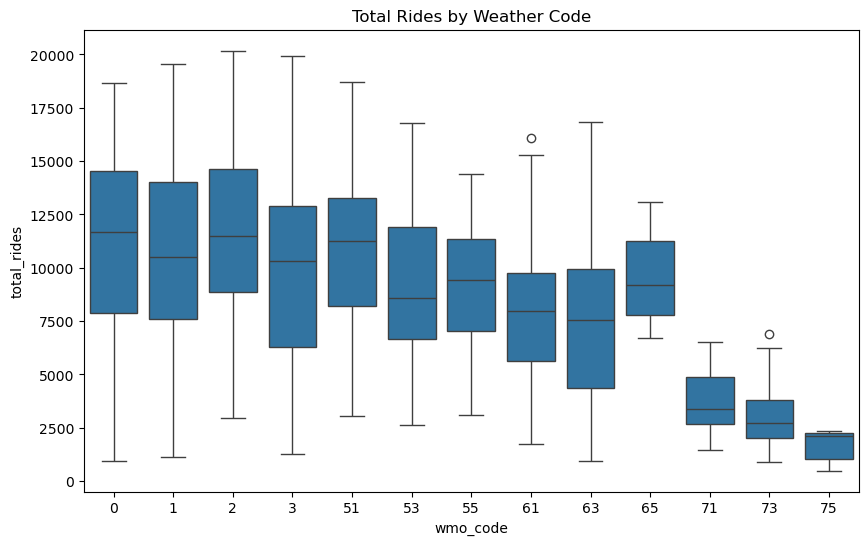

In [69]:
#data visualization for daily data
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_day_clean, x='wmo_code', y='total_rides')        
plt.title('Total Rides by Weather Code')


### Total Rides by Month and Weather Code

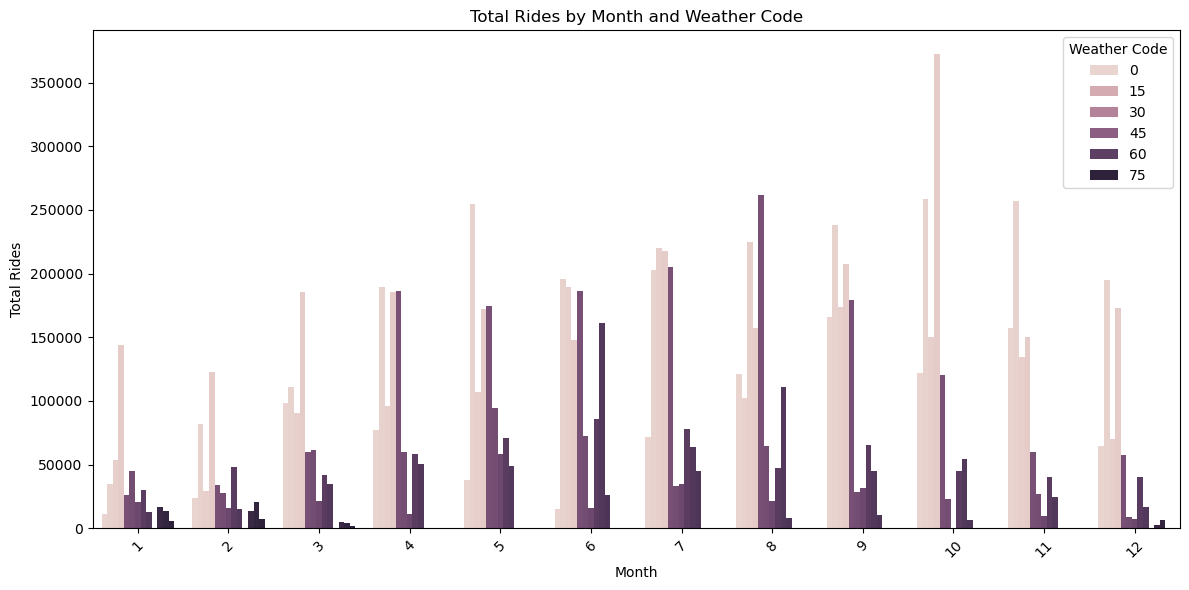

In [70]:
#visualization for df_day_clean using barplot with month 

df_day_clean['date'] = pd.to_datetime(df_day_clean['date'], errors='coerce')
df_day_clean

#  extract the month
df_day_clean['month'] = df_day_clean['date'].dt.month

#  Aggregate total rides per month & weather code
monthly_data = df_day_clean.groupby(['month','wmo_code'], as_index=False)['total_rides'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_data, x='month', y='total_rides', hue='wmo_code', order=range(1,13))
plt.title('Total Rides by Month and Weather Code')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.legend(title='Weather Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Total Rides by month and Weather Code from Daily Data

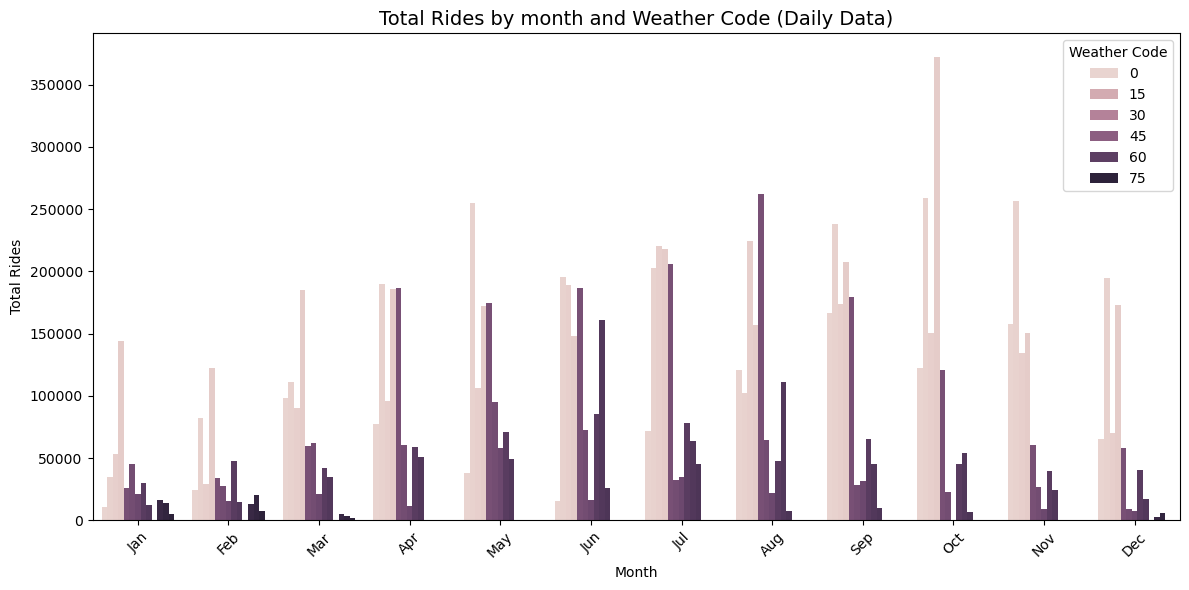

months found in data: ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Convert Date column to datetime (auto-detects day first if needed)
df_day_n['date'] = pd.to_datetime(df_day_n['date'], errors='coerce', dayfirst=True)

# 2. Drop rows where the date could not be parsed
df_day_n = df_day_n.dropna(subset=['date'])

# 3. Extract month as short name (Jan, Feb, etc.)
df_day_n['month'] = df_day_n['date'].dt.month_name().str[:3]

# 4. Aggregate total rides per month and weather code
monthly_data = df_day_n.groupby(['month', 'wmo_code'], as_index=False)['total_rides'].sum()

# 5. Determine which months exist in the dataset (in chronological order)
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
present_months = [m for m in month_order if m in monthly_data['month'].unique()]

# 6. Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=monthly_data,
    x='month', y='total_rides', hue='wmo_code',
    order=present_months
)

plt.title('Total Rides by month and Weather Code (Daily Data)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.legend(title='Weather Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Optional: Print which months actually exist in your dataset
print("months found in data:", present_months)


In [72]:
df_day_clean

,casual,date,member,total_rides,apt_tempt_mean,tempt_2m_mean,wmo_code,wind_speed,day_type,weather_desc,month
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,Rainy,Moderate rain,1
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,Rainy,Slight rain,1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,Rainy,Moderate rain,1
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,Sunny,Overcast,1
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,Rainy,Light drizzle,1
...,...,...,...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1,Snowy,Slight snow fall,12
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8,Sunny,Clear sky,12
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5,Sunny,Mainly clear,12
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8,Sunny,Mainly clear,12


### Total Rides by Session: Morning,Afternoon,Evening,Night

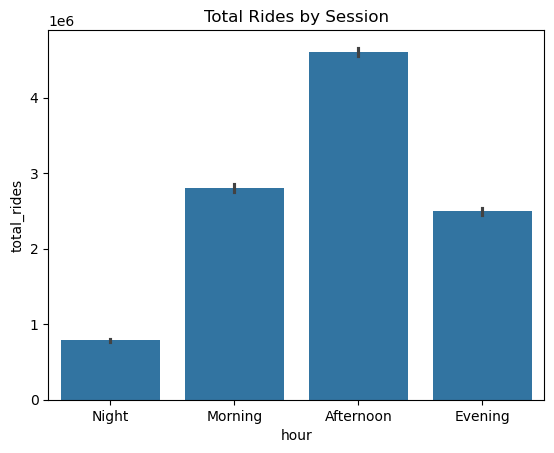

In [73]:
sns.barplot(
    x=df_hr_clean['hour'].apply(
        lambda h: (
            'Morning' if 5 <= h <= 11 else
            'Afternoon' if 12 <= h <= 17 else
            'Evening' if 18 <= h <= 21 else
            'Night'
        )
    ),
    y='total_rides',
    data=df_hr_clean,
    estimator=sum,
    order=['Night', 'Morning', 'Afternoon', 'Evening']
)
plt.title('Total Rides by Session')
plt.show()


### Total Bike Rides: Weekday vs Weekend

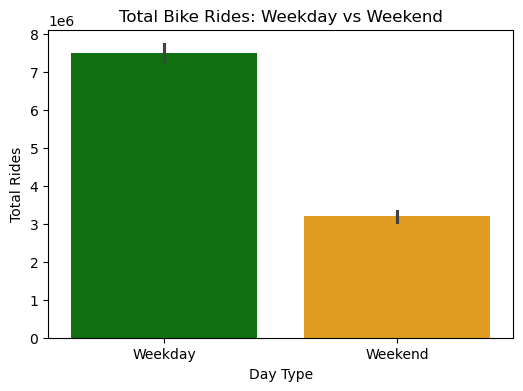

In [74]:

# extracting weekend and weekdays
weekend = df_day_clean['date'].dt.dayofweek.apply(
    lambda x: 'Weekend' if x >= 5 else 'Weekday'
)

# Plot barplot of total rides by Weekend/Weekday
plt.figure(figsize=(6,4))
sns.barplot(
    x = weekend,
    y='total_rides',
    data=df_day_clean,
    estimator=sum,
    order=['Weekday', 'Weekend'],
    palette=['Green', 'Orange'],   
    hue = weekend, 
    legend = False   
)
plt.title('Total Bike Rides: Weekday vs Weekend')
plt.ylabel('Total Rides')
plt.xlabel('Day Type')
plt.grid(False)
plt.show()


/var/folders/tj/8m4f2hl545d85f9bhjg24z500000gn/T/ipykernel_21487/3921077149.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Member Type')


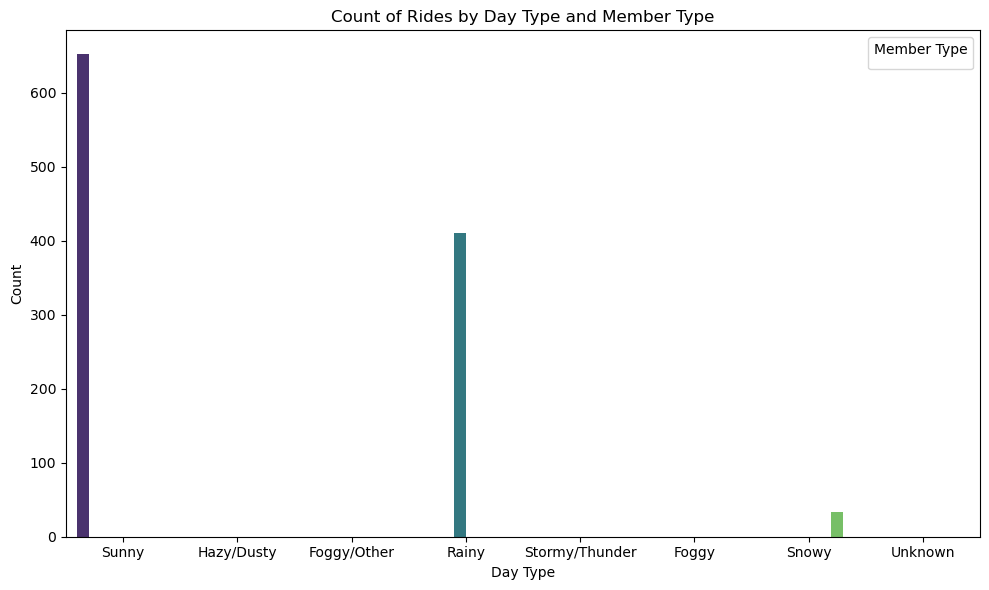

In [75]:
# Daily Trend: weekdays vs weekends and registered users vs casual users for df_day_clean
plt.figure(figsize=(10, 6))
sns.countplot(data=df_day_clean, x='day_type', hue='day_type', palette='viridis') 
plt.title('Count of Rides by Day Type and Member Type')
plt.xlabel('Day Type')
plt.ylabel('Count')
plt.legend(title='Member Type') 
plt.tight_layout()
plt.show()  

### Total Bike Rides: Holiday vs Normal Day

In [ ]:
import holidays


df_day_clean['date'] = pd.to_datetime(df_day_n['date'], errors='coerce', dayfirst=True)
# Generating holiday list
country_holidays = holidays.US(years=[2021, 2022, 2023])

# holiday flag
df_day_clean['is_holiday'] = df_day_clean['date'].isin(country_holidays)

# Create readable day type column
df_day_clean['day_type'] = df_day_clean['is_holiday'].apply(lambda x: 'Holiday' if x else 'Normal')

# Aggregate total rides per day type
df_holiday_summary = df_day_clean.groupby('day_type', as_index=False)['total_rides'].sum()

# Barplot of total rides
plt.figure(figsize=(8,5))
sns.barplot(data=df_holiday_summary, x='day_type', y='total_rides', palette='viridis')
plt.title('Total Bike Rides: Holiday vs Normal Day')
plt.xlabel('Day Type')
plt.ylabel('Total Rides')
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'holidays'

/var/folders/tj/8m4f2hl545d85f9bhjg24z500000gn/T/ipykernel_21487/3412056006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hr_n['wmo_code'] = df_hr_n['wmo_code'].astype(str)  # Ensure wmo_code is treated as a string
/var/folders/tj/8m4f2hl545d85f9bhjg24z500000gn/T/ipykernel_21487/3412056006.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hr_n['date'] = pd.to_datetime(df_hr_n['date'], errors='coerce')


<Figure size 1500x1000 with 0 Axes>

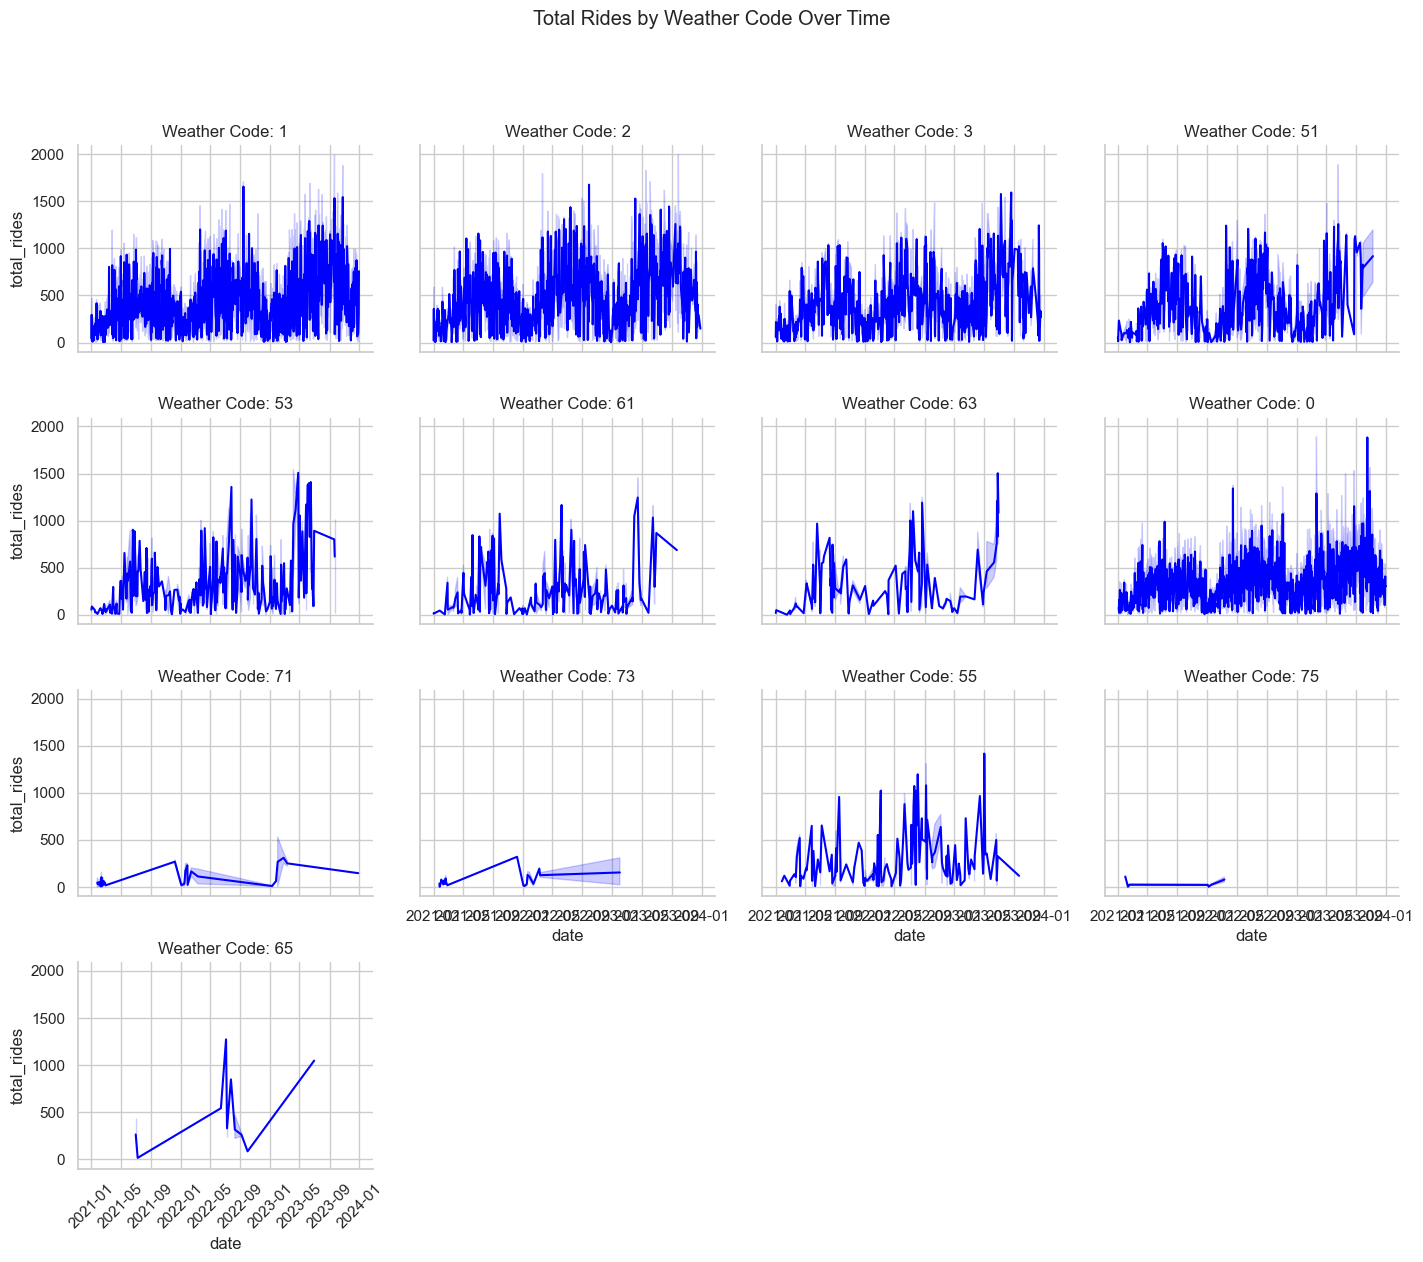

In [80]:
df_hr_n 
#data visualization using facetgrid for horuly data with weather code,total rides and date
plt.figure(figsize=(15, 10))
sns.set_theme(style="whitegrid")                        
df_hr_n['wmo_code'] = df_hr_n['wmo_code'].astype(str)  # Ensure wmo_code is treated as a string
df_hr_n['date'] = pd.to_datetime(df_hr_n['date'], errors='coerce')  
        
g = sns.FacetGrid(df_hr_n, col='wmo_code', col_wrap=4, height=3, aspect=1.2)    
g.map(sns.lineplot, 'date', 'total_rides', color='blue')
g.set_titles("Weather Code: {col_name}")
g.fig.suptitle("Total Rides by Weather Code Over Time", y=1.05)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






In [ ]:
df_day_n

,Casual,Date,Member,Total_rides,apt_tempt_mean,tempt_2m_mean,wmo_code,wind_speed
0,371,2021-01-01 00:00:00,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-01 00:00:00,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-01 00:00:00,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-01 00:00:00,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-01 00:00:00,2004,3061,1.4,4.0,51,9.2
...,...,...,...,...,...,...,...,...
1090,646,2021-02-15 00:00:00,1934,2580,-8.6,-4.3,71,10.1
1091,3099,2021-02-15 00:00:00,4819,7918,-7.0,-2.5,0,12.8
1092,3491,2021-02-15 00:00:00,5168,8659,-7.8,-3.9,1,9.5
1093,3097,2021-02-15 00:00:00,4497,7594,-7.3,-2.9,1,13.8


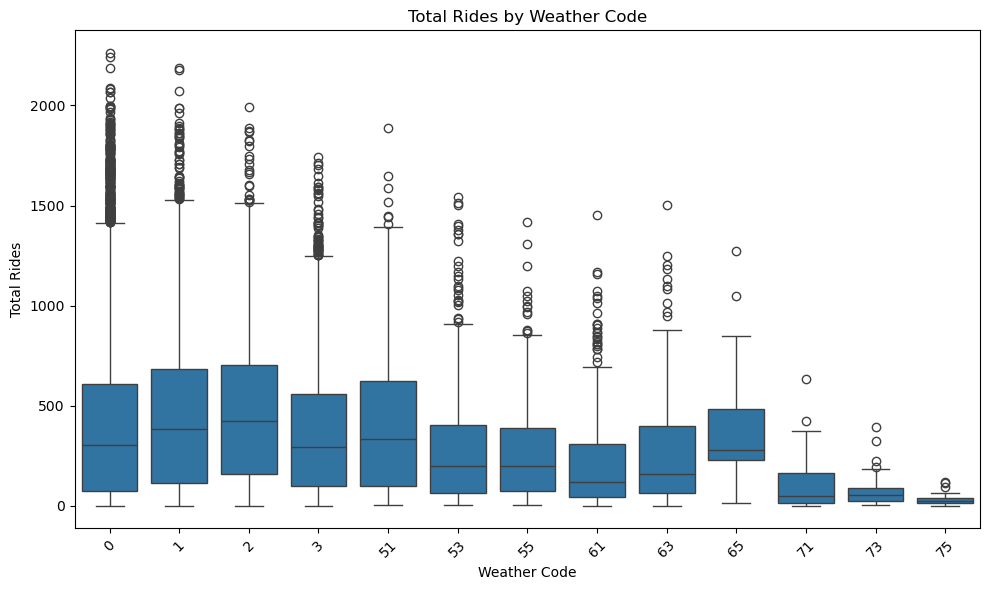

In [ ]:
#data visualization 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hr_n, x='wmo_code', y='Total_rides')        
plt.title('Total Rides by Weather Code')
plt.xlabel('Weather Code')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  
# df = pd.read_csv("/Users/ms/Desktop/CAB/Datasets/BikeShare/Datasets/CBS_2021_2023/CBS_2021-2023_Full.csv")

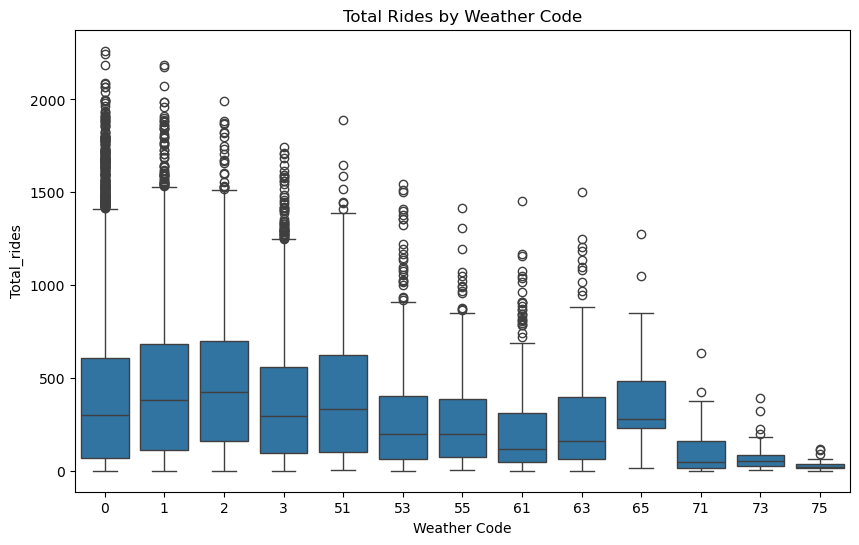

In [ ]:
#visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hr_n, x='wmo_code', y='Total_rides')    
# --- IGNORE ---
plt.title('Total Rides by Weather Code')
plt.xlabel('Weather Code')  
plt.show()  


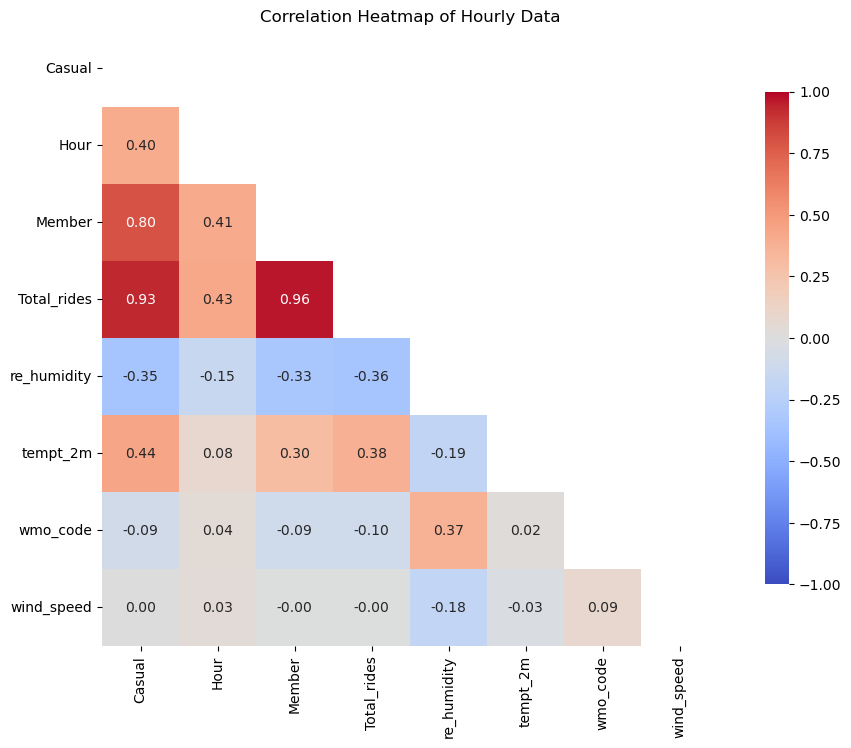

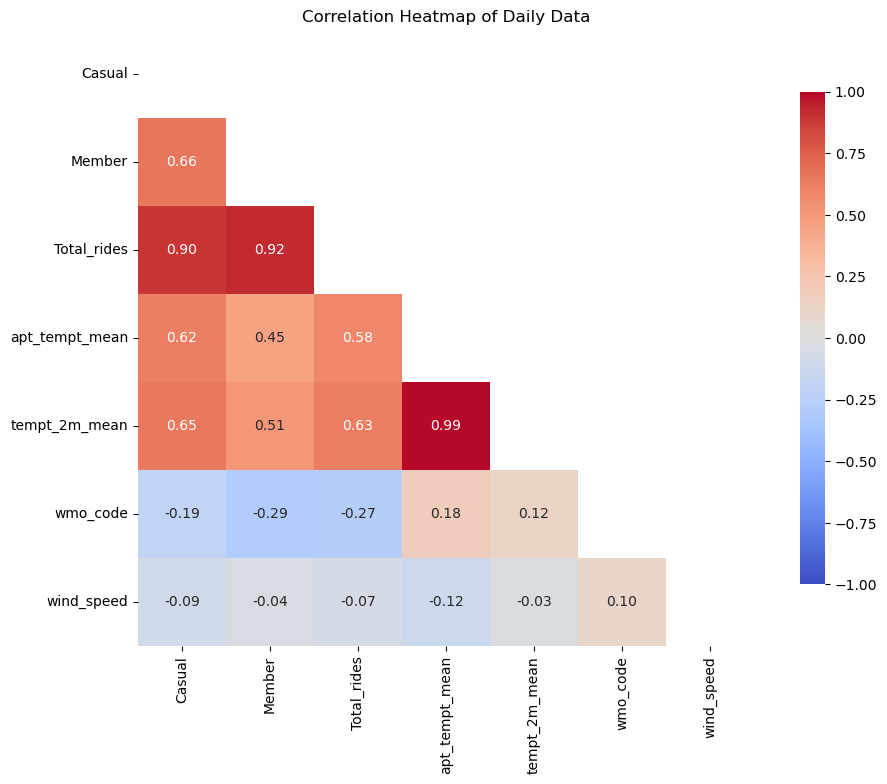

In [ ]:
#visualization using heatmap    
#  Select only numeric columns
numeric_df = df_hr_n.select_dtypes(include=['float64', 'int64'])

#  correlation
corr_matrix = numeric_df.corr()

# heatmap
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',mask=mask, fmt='.2f',vmax=1, vmin=-1, square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Hourly Data')
plt.show()

#visualization using heatmap for df_day
#  Select only numeric columns
numeric_df_day = df_day_n.select_dtypes(include=['float64', 'int64'])   
#  correlation
corr_matrix_day = numeric_df_day.corr()
# heatmap
plt.figure(figsize=(12, 8))
mask_day = np.triu(np.ones_like(corr_matrix_day, dtype=bool))   
sns.heatmap(corr_matrix_day, annot=True, cmap='coolwarm', mask=mask_day, fmt='.2f', vmax=1, vmin=-1, square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Daily Data')
plt.show()  

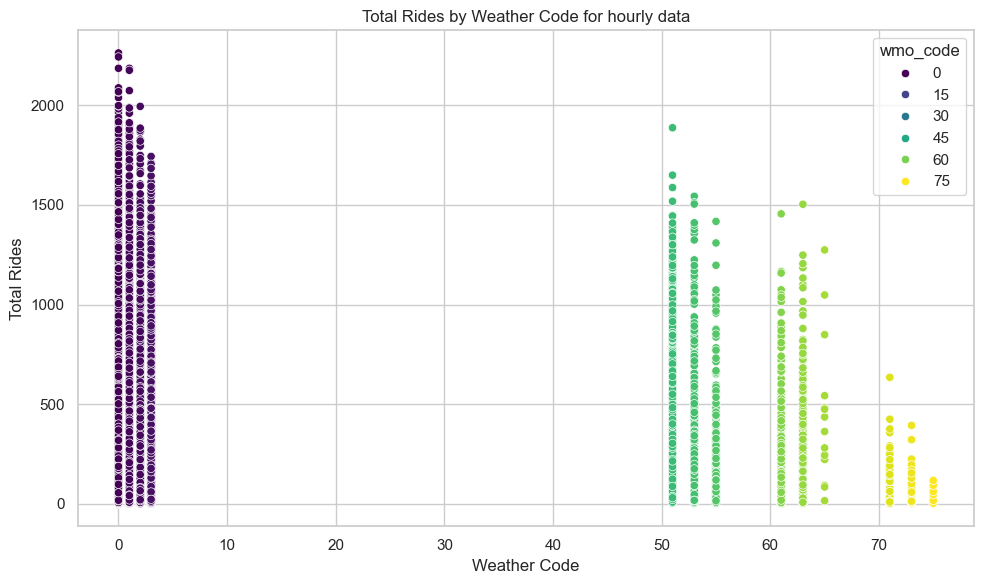

In [ ]:
#visualization of relationship between 'Total_rides' and 'wmo_code'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_hr_clean, x='wmo_code', y='Total_rides', hue='wmo_code', palette='viridis') 
plt.title('Total Rides by Weather Code for hourly data')
plt.xlabel('Weather Code')
plt.ylabel('Total Rides')   
plt.tight_layout()
plt.show()  

In [ ]:
df_day_clean


,casual,date,member,total_rides,apt_tempt_mean,tempt_2m_mean,wmo_code,wind_speed,day_type,weather_desc,month,is_holiday
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,Holiday,Moderate rain,1,True
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,Normal,Slight rain,1,False
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,Normal,Moderate rain,1,False
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,Normal,Overcast,1,False
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,Normal,Light drizzle,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1,Normal,Slight snow fall,12,False
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8,Normal,Clear sky,12,False
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5,Normal,Mainly clear,12,False
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8,Normal,Mainly clear,12,False


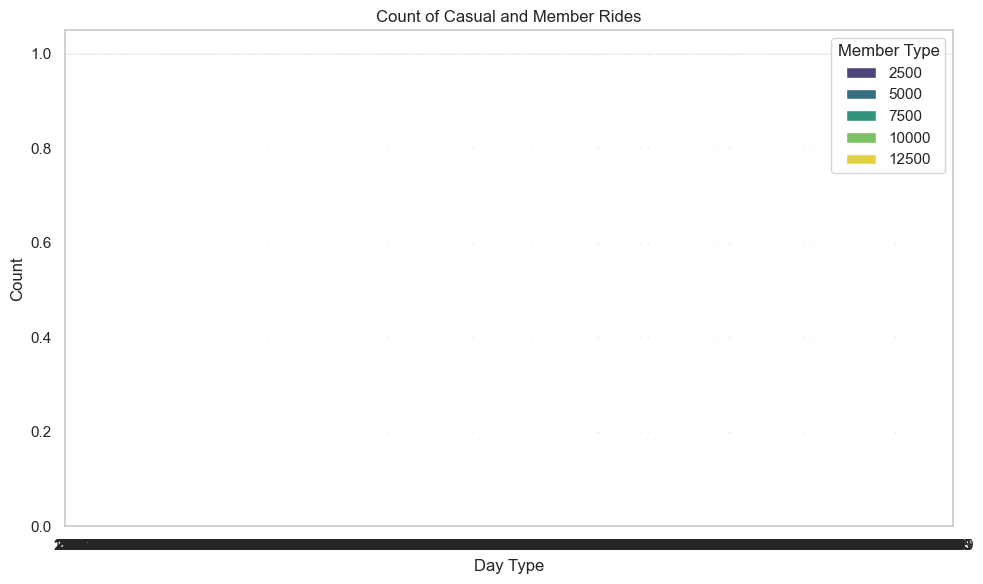

In [ ]:
#visualization from day data
#visualization of casual,memmbers and total rides using countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_day_clean, x='casual', hue='member', palette='viridis')   
plt.title('Count of Casual and Member Rides')
plt.xlabel('Day Type')
plt.ylabel('Count')
plt.legend(title='Member Type') 
plt.tight_layout()
plt.show()


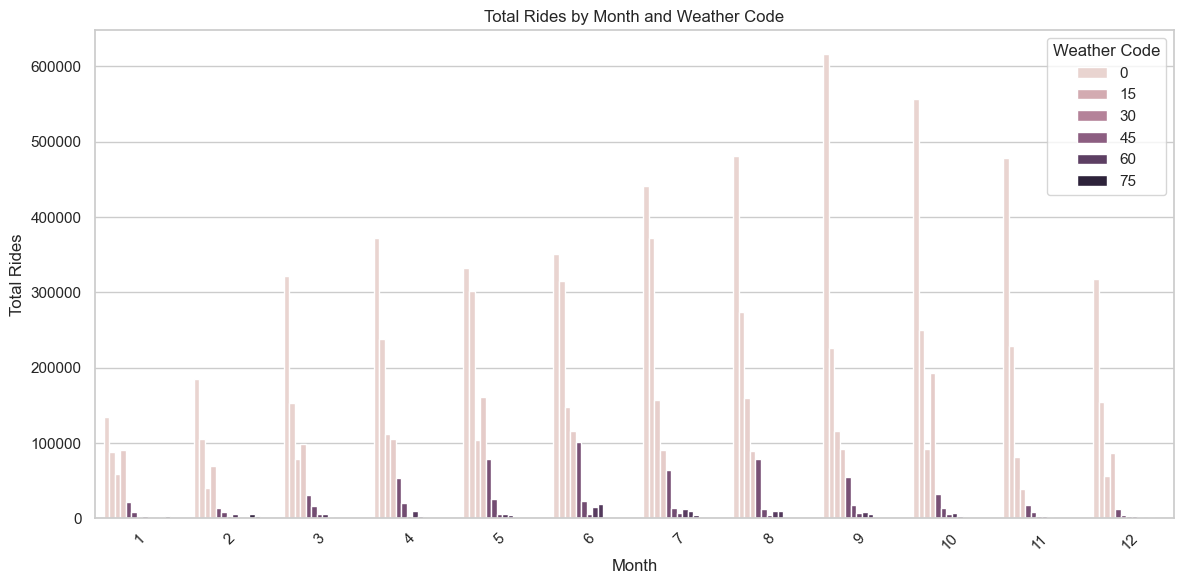

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ensure Date is datetime
df_hr_clean['Date'] = pd.to_datetime(df_hr_clean['Date'], errors='coerce', dayfirst=True)

# 2. Extract month (numeric or name)
df_hr_clean['Month'] = df_hr_clean['Date'].dt.month  # 1 to 12

# 3. Aggregate total rides by month & weather
monthly_data = df_hr_clean.groupby(['Month', 'wmo_code'], as_index=False)['Total_rides'].sum()

# 4. Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_data, x='Month', y='Total_rides', hue='wmo_code', order=range(1,13))
plt.title('Total Rides by Month and Weather Code')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.legend(title='Weather Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Data Cleaning and Visualization with Full Data 

### importing all the lirbaries 

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [90]:
df_full = pd.read_csv('CBS_Full.csv',low_memory= False,parse_dates=['started_at','ended_at'])
# df_full.head()

In [91]:
df_full

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693992,1E69FA72F720F2E7,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955.0,Market Square / King St & Royal St,31042.0,38.806002,-77.055911,38.804718,-77.043363,member
10693993,BA9E9FDBFAFDE618,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884185,-76.995396,38.890461,-76.988355,member
10693994,F3B6C6BFB1F738D0,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285.0,23rd & E St NW,31260.0,38.909394,-77.048728,38.896104,-77.049882,casual
10693995,D2DB18DB58BC83D2,classic_bike,2023-12-31 23:59:30,2024-01-01 02:02:07,22nd & P ST NW,31285.0,22nd & P ST NW,31285.0,38.909394,-77.048728,38.909394,-77.048728,casual


In [92]:
df_full.info()
print('Info of the dataframe\n:','\n' )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 1.0+ GB
Info of the dataframe
: 



### Minimizing the momory space step by step

In [93]:
# Check unique values before conversion
unique_values_before = df_full.nunique()
print("Unique values before conversion:\n", unique_values_before, '\n')

Unique values before conversion:
 ride_id               10693997
rideable_type                3
started_at             9649173
ended_at               9638365
start_station_name         860
start_station_id          1321
end_station_name           865
end_station_id            1338
start_lat               570110
start_lng               617671
end_lat                 173835
end_lng                 183886
member_casual                2
dtype: int64 



In [94]:
# Check Memory usage before converting
memory_usage = df_full.memory_usage(deep=True)
print("Memory Usage before Converting dtypes:\n", memory_usage, '\n')

Memory Usage before Converting dtypes:
 Index                       132
ride_id               695109805
rideable_type         654238494
started_at             85551976
ended_at               85551976
start_station_name    740478725
start_station_id      580968994
end_station_name      736905216
end_station_id        579326908
start_lat              85551976
start_lng              85551976
end_lat                85551976
end_lng                85551976
member_casual         588169835
dtype: int64 



In [95]:
# Copy the dataframe
df_full_n = df_full.copy()

# Convert categorical columns to category type for memory efficiency
df_full_n["rideable_type"] = df_full_n["rideable_type"].astype("category")
df_full_n["start_station_name"] = df_full_n["start_station_name"].astype("category")
df_full_n["end_station_name"] = df_full_n["end_station_name"].astype("category")
df_full_n["member_casual"] = df_full_n["member_casual"].astype("category")

# Convert started_at and ended_at to datetime for memory efficiency
df_full_n['started_at'] = pd.to_datetime(df_full_n['started_at'])
df_full_n['ended_at'] = pd.to_datetime(df_full_n['ended_at'])

# Regenerate the entire ride_id column with sequential integers and convert it
# to a memory-efficient data type (uint32)
df_full_n['ride_id'] = pd.Series(range(1, len(df_full_n) + 1), dtype='uint32')

In [96]:
# Check info and dtypes after conversion
info_after = df_full_n.info()
print("Info of the DataFrame after conversion:\n", info_after, '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             uint32        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  category      
 5   start_station_id    object        
 6   end_station_name    category      
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
dtypes: category(4), datetime64[ns](2), float64(4), object(2), uint32(1)
memory usage: 754.8+ MB
Info of the DataFrame after conversion:
 None 



In [97]:
# Check unique values after conversion
unique_values_after = df_full_n.nunique()
print("Unique values after conversion:\n", unique_values_after, '\n')

Unique values after conversion:
 ride_id               10693997
rideable_type                3
started_at             9649173
ended_at               9638365
start_station_name         860
start_station_id          1321
end_station_name           865
end_station_id            1338
start_lat               570110
start_lng               617671
end_lat                 173835
end_lng                 183886
member_casual                2
dtype: int64 



In [98]:
# Check memory usage after all conversions
print("Memory Usage after Converting dtype:\n", df_full_n.memory_usage(deep=True), '\n')

Memory Usage after Converting dtype:
 Index                       132
ride_id                42775988
rideable_type          10694288
started_at             85551976
ended_at               85551976
start_station_name     21485201
start_station_id      580968994
end_station_name       21485559
end_station_id        579326908
start_lat              85551976
start_lng              85551976
end_lat                85551976
end_lng                85551976
member_casual          10694215
dtype: int64 



In [99]:
# Calculate how much we reduced the in-memory footprint of the dataset
reduction = df_full_n.memory_usage(deep=True).sum() / df_full.memory_usage(deep=True).sum()
print(f"We reduced the in-memory footprint of the dataset to {reduction:.2f} of its original size.")

We reduced the in-memory footprint of the dataset to 0.35 of its original size.


In [100]:
df_full_n.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64

In [101]:
df_full_clean = df_full_n.dropna()
df_full_clean.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [102]:
df_full_clean.duplicated().sum()

np.int64(0)

In [103]:
df_full_clean.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,1,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
2,3,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,4,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,5,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member
6,7,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,38.867373,-76.988039,casual


### Data Visualization


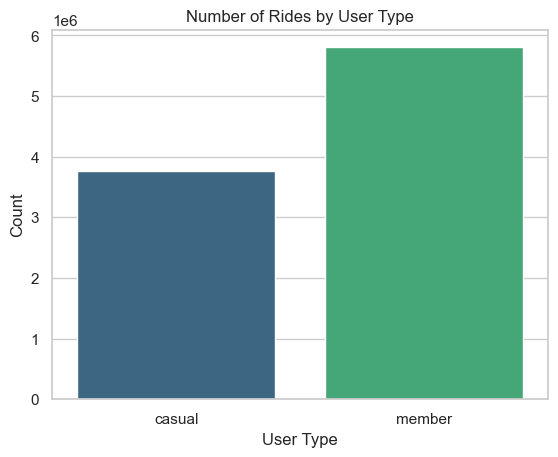

In [104]:
sns.countplot(data=df_full_clean, x='member_casual', palette='viridis',hue = 'member_casual')
plt.title('Number of Rides by User Type')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()  


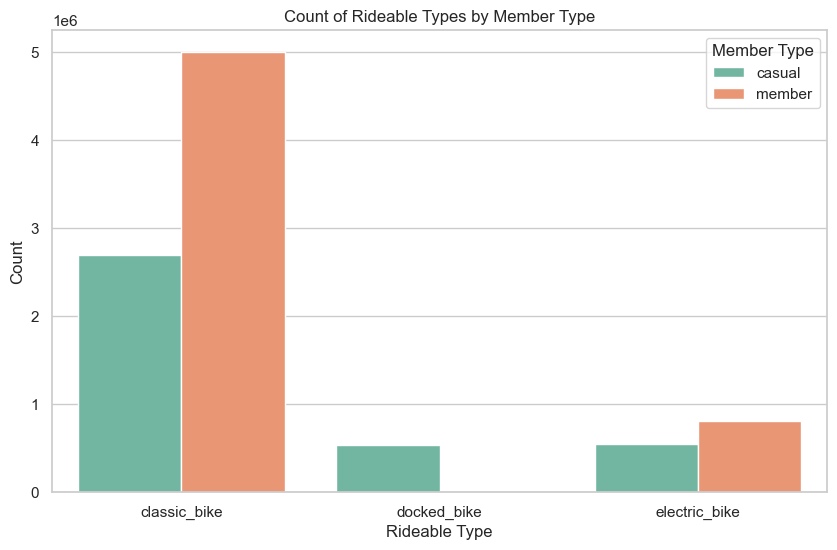

In [105]:
# data  visualisation using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df_full_clean, x='rideable_type', hue='member_casual', palette='Set2')   
plt.title('Count of Rideable Types by Member Type')
plt.xlabel('Rideable Type')
plt.ylabel('Count')
plt.legend(title='Member Type') 
plt.show()  

/var/folders/tj/8m4f2hl545d85f9bhjg24z500000gn/T/ipykernel_21487/2708029576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_clean['started_at'] = pd.to_datetime(df_full_clean['started_at'])
/var/folders/tj/8m4f2hl545d85f9bhjg24z500000gn/T/ipykernel_21487/2708029576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_clean['ended_at'] = pd.to_datetime(df_full_clean['ended_at'])
/var/folders/tj/8m4f2hl545d85f9bhjg24z500000gn/T/ipykernel_21487/2708029576.py:3: SettingWithCopyWarning: 
A val

Text(0.5, 1.0, 'Ride Duration by User Type')

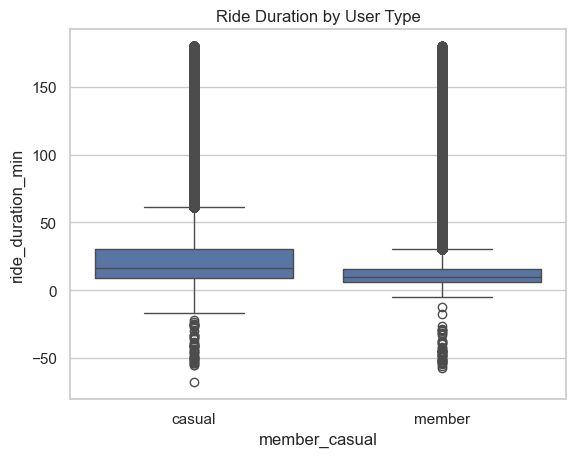

In [106]:
df_full_clean['started_at'] = pd.to_datetime(df_full_clean['started_at'])
df_full_clean['ended_at'] = pd.to_datetime(df_full_clean['ended_at'])
df_full_clean['ride_duration_min'] = (df_full_clean['ended_at'] - df_full_clean['started_at']).dt.total_seconds() / 60
df_full_clean = df_full_clean[df_full_clean['ride_duration_min'] < 180]  # remove outliers
sns.boxplot(data=df_full_clean, x='member_casual', y='ride_duration_min')
plt.title('Ride Duration by User Type')


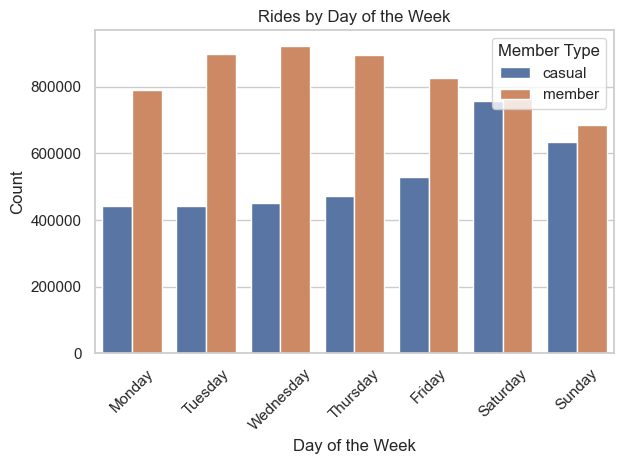

In [107]:
# Ride per week  
df_full_clean['weekday'] = df_full_clean['started_at'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df_full_clean, x='weekday', hue='member_casual', order=weekday_order)
plt.title('Rides by Day of the Week')
plt.xlabel('Day of the Week')   
plt.ylabel('Count')
plt.legend(title='Member Type') 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  

In [108]:
df_full_clean

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration_min,weekday
0,1,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member,25.333333,Friday
2,3,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member,14.216667,Friday
3,4,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member,5.583333,Friday
4,5,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member,3.233333,Friday
6,7,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,38.867373,-76.988039,casual,17.366667,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693991,10693992,classic_bike,2023-12-31 23:57:56,2024-01-01 00:02:25,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884095,-76.995234,38.890461,-76.988355,casual,4.483333,Sunday
10693992,10693993,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955.0,Market Square / King St & Royal St,31042.0,38.806002,-77.055911,38.804718,-77.043363,member,14.383333,Sunday
10693993,10693994,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884185,-76.995396,38.890461,-76.988355,member,4.016667,Sunday
10693994,10693995,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285.0,23rd & E St NW,31260.0,38.909394,-77.048728,38.896104,-77.049882,casual,129.733333,Sunday


# Presentation Parts 

In [109]:
df_hr_clean

,casual,date,hour,member,total_rides,re_humidity,tempt_2m,wmo_code,wind_speed,DayOfWeek
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,Friday
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,Friday
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,Friday
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,Friday
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,Friday
...,...,...,...,...,...,...,...,...,...,...
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3,Sunday
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7,Sunday
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0,Sunday
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7,Sunday


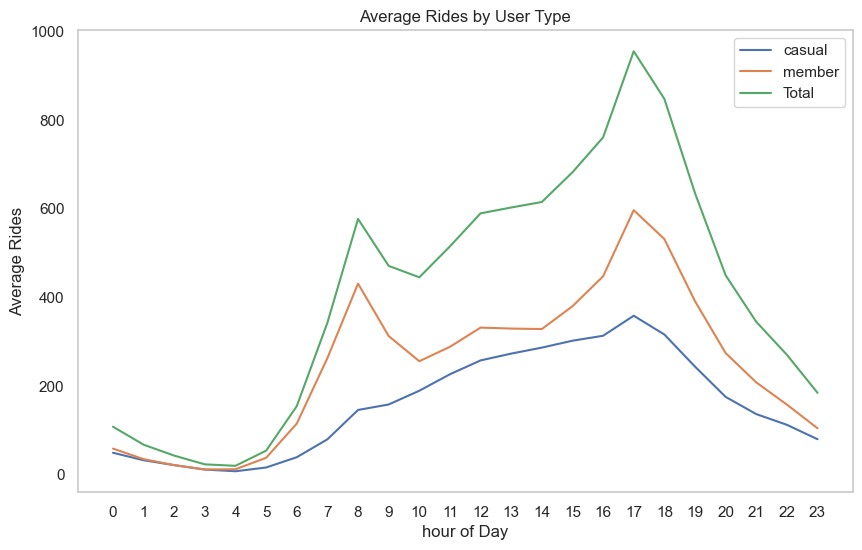

In [110]:
#Two clear peaks during commute hours (8 AM, 5–6 PM). 
# Members dominate weekdays, casual users peak weekends.
df_hr_clean['date'] = pd.to_datetime(df_hr_clean['date'])
df_hr_clean['hour'] = df_hr_clean['hour'].astype(int)

# Aggregate avg rides by hour
df_hr_clean_grouped = (df_hr_clean.groupby('hour')[['casual', 'member', 'total_rides']].mean().reset_index())

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=df_hr_clean_grouped, x='hour', y='casual', label='casual')
sns.lineplot(data=df_hr_clean_grouped, x='hour', y='member', label='member')
sns.lineplot(data=df_hr_clean_grouped, x='hour', y='total_rides', label='Total')
plt.title("Average Rides by User Type")
plt.xlabel("hour of Day")
plt.ylabel("Average Rides")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(False)
plt.show()


### Weekly Patterns & Weekend Usage

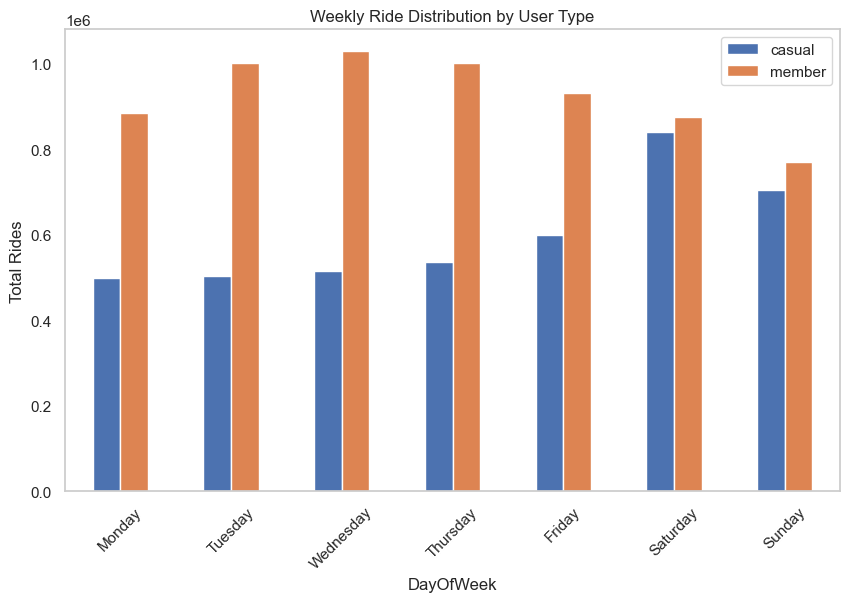

In [124]:
#Members dominate weekdays; casual users spike on weekends. 
# Suggest weekend-targeted promotions for casual riders.

# Extract day of week
df_hr_clean['DayOfWeek'] = df_hr_clean['date'].dt.day_name()

# Aggregate
weekly_grouped = df_hr_clean.groupby('DayOfWeek')[['casual','member','total_rides']].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).reset_index()

# Plot
weekly_grouped.set_index('DayOfWeek')[['casual','member']].plot(kind='bar', figsize=(10,6))
plt.title("Weekly Ride Distribution by User Type")
plt.ylabel("Total Rides")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


### Seasonal / Daily Trend

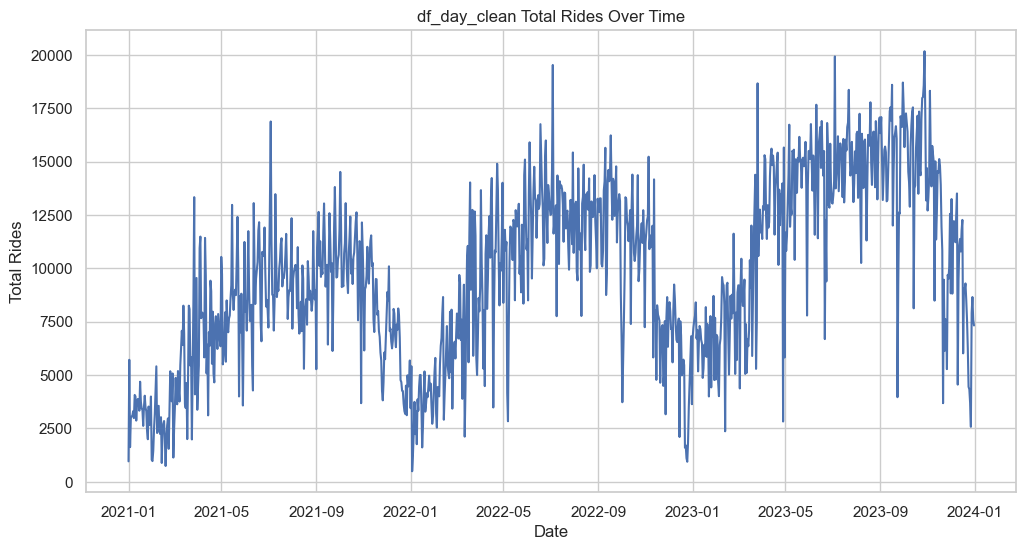

In [112]:
# # Time series plot – total rides per day

df_day_clean['date'] = pd.to_datetime(df_day_clean['date'])

# Plot total rides over time
plt.figure(figsize=(12,6))
sns.lineplot(data=df_day_clean, x='date', y='total_rides')
plt.title("df_day_clean Total Rides Over Time")
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.show()


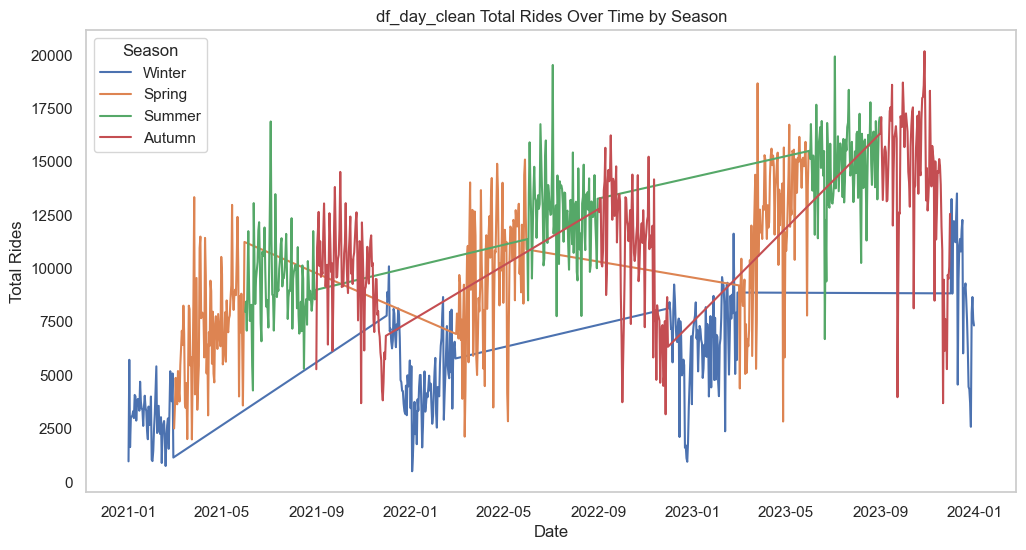

In [125]:
#Ridership peaks in summer, dips in winter. 
# Suggest seasonal fleet adjustments.
df_day_clean['date'] = pd.to_datetime(df_day_clean['date'])

# Define seasons by month
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

# Add season column
df_day_clean['season'] = df_day_clean['date'].dt.month.apply(get_season)

# Plot total rides over time, colored by season
plt.figure(figsize=(12,6))
sns.lineplot(data=df_day_clean, x='date', y='total_rides', hue='season')
plt.title("df_day_clean Total Rides Over Time by Season")
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.legend(title="Season")
plt.grid(False)
plt.show()


/var/folders/tj/8m4f2hl545d85f9bhjg24z500000gn/T/ipykernel_21487/168386206.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_start_stations.values, y=top_start_stations.index, palette="viridis")


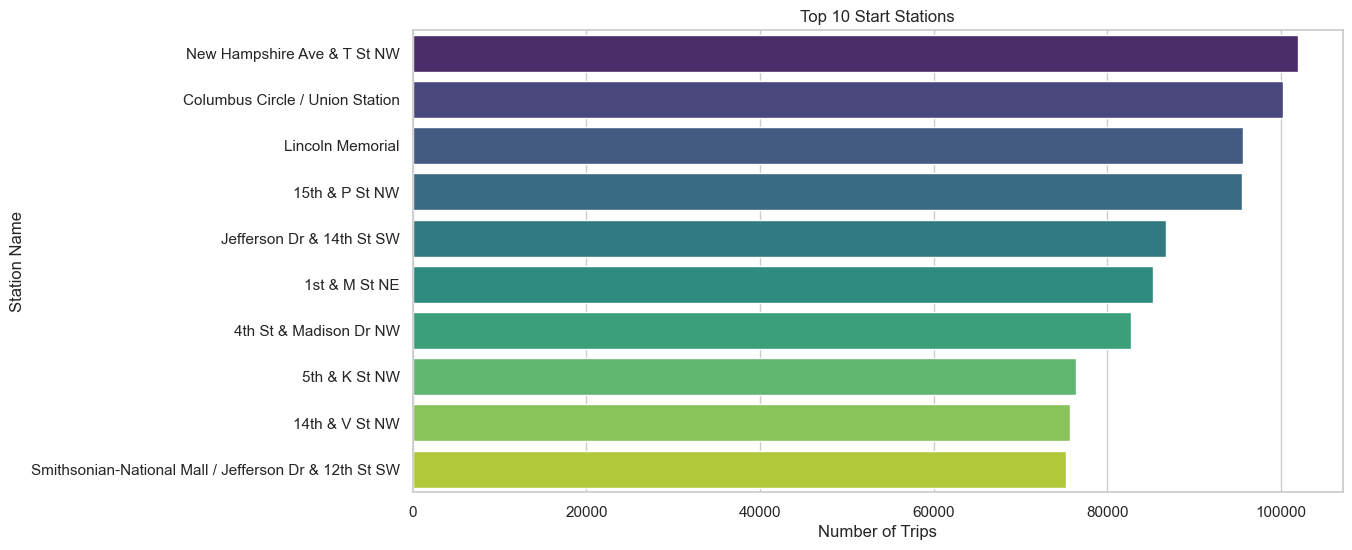

In [130]:
# Top 10 start stations
top_start_stations = df_full_clean['start_station_name'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_start_stations.values, y=top_start_stations.index, palette="viridis")
plt.title("Top 10 Start Stations")
plt.xlabel("Number of Trips")
plt.ylabel("Station Name")
plt.show()


### Station Supply & Demand

/var/folders/tj/8m4f2hl545d85f9bhjg24z500000gn/T/ipykernel_21487/3268706326.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='imbalance', y='station', data=top_stations, palette='viridis')


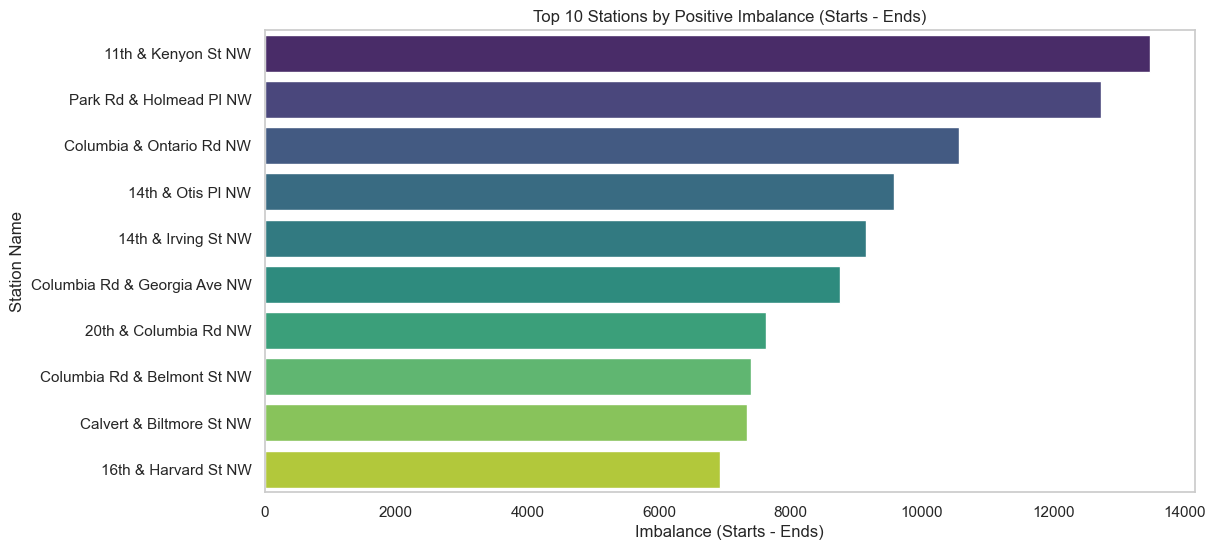

/var/folders/tj/8m4f2hl545d85f9bhjg24z500000gn/T/ipykernel_21487/3268706326.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='imbalance', y='station', data=bottom_stations, palette='magma')


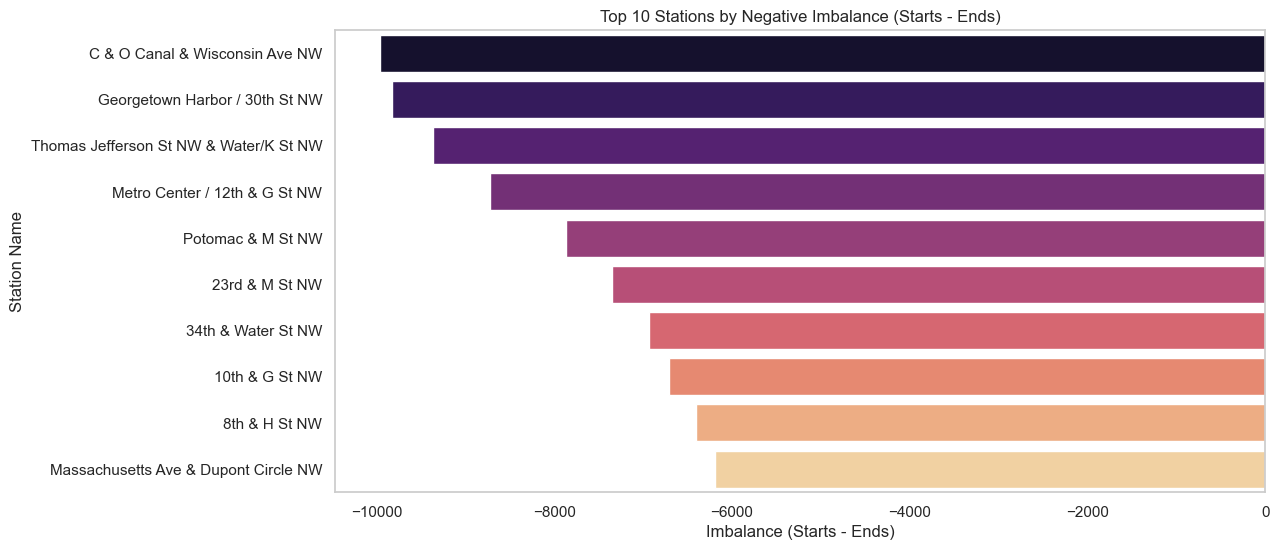

In [127]:
#Certain stations consistently have bike shortages 
# or surpluses → redistribute bikes proactively.

# Ensure station names are strings
df_full_clean['start_station_name'] = df_full_clean['start_station_name'].astype(str)
df_full_clean['end_station_name'] = df_full_clean['end_station_name'].astype(str)

# Aggregate starts
starts = df_full_clean.groupby('start_station_name')['ride_id'].count().reset_index()
starts = starts.rename(columns={'ride_id': 'starts', 'start_station_name': 'station'})

# Aggregate ends
ends = df_full_clean.groupby('end_station_name')['ride_id'].count().reset_index()
ends = ends.rename(columns={'ride_id': 'ends', 'end_station_name': 'station'})

# Merge both
station_stats = pd.merge(starts, ends, on='station', how='outer').fillna(0)

# Calculate imbalance
station_stats['imbalance'] = station_stats['starts'] - station_stats['ends']

# --- Top 10 positive imbalance ---
top_stations = station_stats.sort_values('imbalance', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='imbalance', y='station', data=top_stations, palette='viridis')
plt.title("Top 10 Stations by Positive Imbalance (Starts - Ends)")
plt.xlabel("Imbalance (Starts - Ends)")
plt.ylabel("Station Name")
plt.grid(False)
plt.show()

# --- Top 10 negative imbalance ---
bottom_stations = station_stats.sort_values('imbalance', ascending=True).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='imbalance', y='station', data=bottom_stations, palette='magma')
plt.title("Top 10 Stations by Negative Imbalance (Starts - Ends)")
plt.xlabel("Imbalance (Starts - Ends)")
plt.ylabel("Station Name")
plt.grid(False)
plt.show()


/var/folders/tj/8m4f2hl545d85f9bhjg24z500000gn/T/ipykernel_21487/1386706153.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_routes.values, y=top_routes.index, palette="magma")


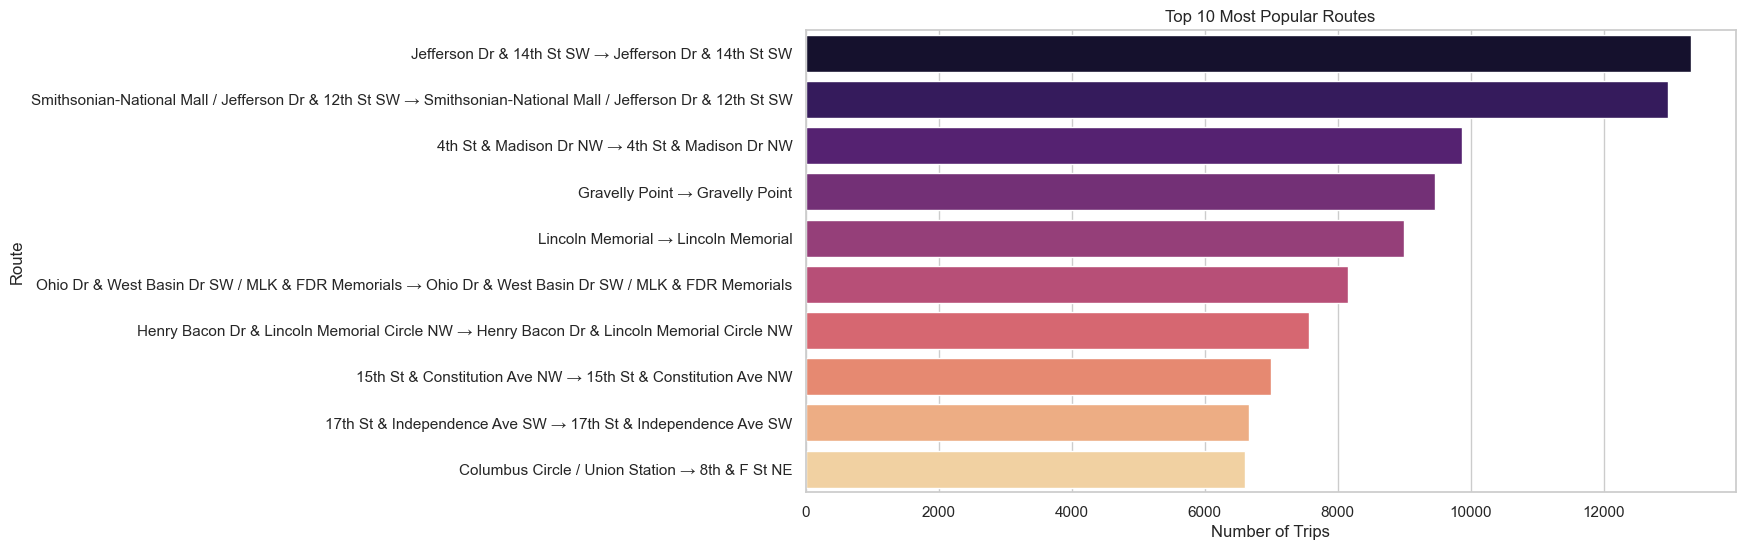

In [131]:
#top 10 route
# Create route column
df_full_clean['route'] = df_full_clean['start_station_name'] + " → " + df_full_clean['end_station_name']

# Top 10 routes
top_routes = df_full_clean['route'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_routes.values, y=top_routes.index, palette="magma")
plt.title("Top 10 Most Popular Routes")
plt.xlabel("Number of Trips")
plt.ylabel("Route")
plt.show()


In [151]:
import folium

# Aggregate trips per station
station_counts = df_full_clean.groupby(['start_station_name','start_lat','start_lng']).size().reset_index(name='trip_count')

# Top 10 stations by number of trips
top_stations = station_counts.sort_values('trip_count', ascending=False).head(10)


In [152]:
# Center map
map_center = [top_stations['start_lat'].mean(), top_stations['start_lng'].mean()]
m = folium.Map(location=map_center, zoom_start=13)


In [153]:
for _, row in top_stations.iterrows():
    folium.CircleMarker(
        location=[row['start_lat'], row['start_lng']],
        radius=row['trip_count'] / 500,  # adjust divisor for scale
        popup=f"{row['start_station_name']}: {row['trip_count']} trips",
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m)

# Display map
m

m.save("top_stations_map.html")


# from IPython.display import IFrame

# # Save map
# m.save("top_stations_map.html")

# # Display in notebook
# IFrame("top_stations_map.html", width=700, height=500)


# Save the map
# m.save("top_stations_map.html")



### Trip Duration & Bike Type Preference

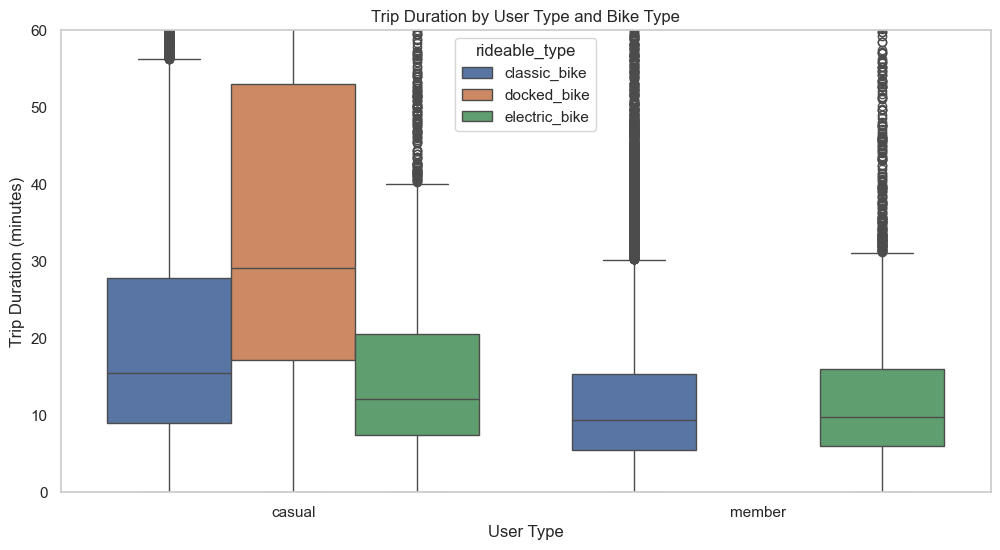

In [128]:
# Create trip duration in minutes
df_full_clean['trip_duration_min'] = (df_full_clean['ended_at'] - df_full_clean['started_at']).dt.total_seconds() / 60

# Plot
plt.figure(figsize=(12,6))
sns.boxplot(x='member_casual', y='trip_duration_min', hue='rideable_type', data=df_full_clean.sample(50000))
plt.ylim(0,60)  # Limit for visualization
plt.title("Trip Duration by User Type and Bike Type")
plt.ylabel("Trip Duration (minutes)")
plt.xlabel("User Type")
plt.grid(False)
plt.show()


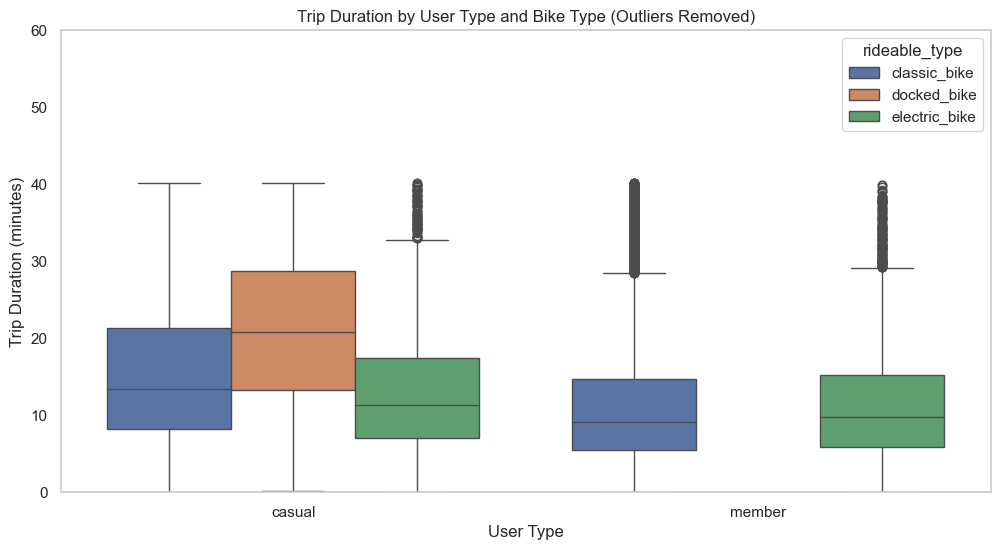

In [134]:


# Calculate trip duration in minutes 
df_full_clean['trip_duration_min'] = (df_full_clean['ended_at'] - df_full_clean['started_at']).dt.total_seconds() / 60

# Remove outliers using IQR
Q1 = df_full_clean['trip_duration_min'].quantile(0.25)
Q3 = df_full_clean['trip_duration_min'].quantile(0.75)
IQR = Q3 - Q1

# Keep only values within 1.5*IQR
df_no_outliers = df_full_clean[(df_full_clean['trip_duration_min'] >= Q1 - 1.5*IQR) &
                               (df_full_clean['trip_duration_min'] <= Q3 + 1.5*IQR)]

# Plot without outliers
plt.figure(figsize=(12,6))
sns.boxplot(x='member_casual', y='trip_duration_min', hue='rideable_type', 
            data=df_no_outliers.sample(50000))
plt.ylim(0, 60)
plt.title("Trip Duration by User Type and Bike Type (Outliers Removed)")
plt.ylabel("Trip Duration (minutes)")
plt.xlabel("User Type")
plt.grid(False)
plt.show()


/var/folders/tj/8m4f2hl545d85f9bhjg24z500000gn/T/ipykernel_21487/2817070605.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_no_outliers = df_full_clean.groupby(['member_casual', 'rideable_type'], group_keys=False).apply(remove_outliers)
/var/folders/tj/8m4f2hl545d85f9bhjg24z500000gn/T/ipykernel_21487/2817070605.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_no_outliers = df_full_clean.groupby(['member_casual', 'rideable_type'], group_keys=False).apply(remove_outliers)


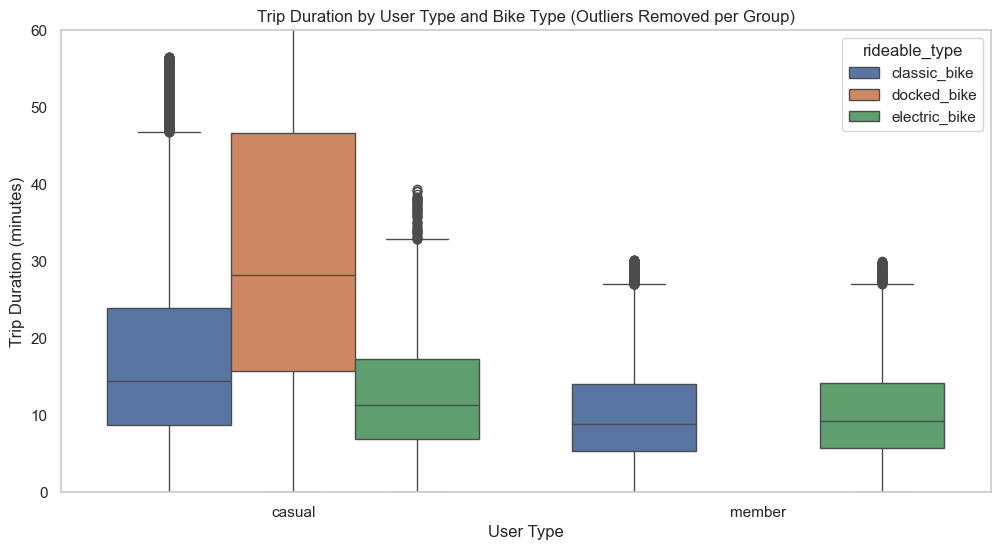

In [135]:

# Function to remove outliers per group
def remove_outliers(group):
    Q1 = group['trip_duration_min'].quantile(0.25)
    Q3 = group['trip_duration_min'].quantile(0.75)
    IQR = Q3 - Q1
    return group[(group['trip_duration_min'] >= Q1 - 1.5*IQR) &
                 (group['trip_duration_min'] <= Q3 + 1.5*IQR)]

# Apply per group (member type × rideable type)
df_no_outliers = df_full_clean.groupby(['member_casual', 'rideable_type'], group_keys=False).apply(remove_outliers)

# Plot
plt.figure(figsize=(12,6))
sns.boxplot(x='member_casual', y='trip_duration_min', hue='rideable_type', 
            data=df_no_outliers.sample(50000))
plt.ylim(0, 60)
plt.title("Trip Duration by User Type and Bike Type (Outliers Removed per Group)")
plt.ylabel("Trip Duration (minutes)")
plt.xlabel("User Type")
plt.grid(False)
plt.show()


In [122]:
df_full_clean.groupby(['member_casual','rideable_type']).size()


/var/folders/tj/8m4f2hl545d85f9bhjg24z500000gn/T/ipykernel_21487/2881428072.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_full_clean.groupby(['member_casual','rideable_type']).size()


member_casual  rideable_type
casual         classic_bike     2668235
               docked_bike       517752
               electric_bike     543412
member         classic_bike     4992235
               docked_bike            2
               electric_bike     803335
dtype: int64

In [160]:
import folium
from folium.plugins import HeatMap
from IPython.display import IFrame

# Aggregate starts and ends
starts = df_full_clean.groupby(['start_station_name','start_lat','start_lng']).size().reset_index(name='starts')
ends   = df_full_clean.groupby(['end_station_name','end_lat','end_lng']).size().reset_index(name='ends')

# Merge once
station_stats = pd.merge(
    starts, ends,
    left_on=['start_station_name','start_lat','start_lng'],
    right_on=['end_station_name','end_lat','end_lng'],
    how='outer'
).fillna(0)

# Calculate imbalance
station_stats['imbalance'] = station_stats['starts'] - station_stats['ends']

# Drop rows with missing coords
station_stats = station_stats.dropna(subset=['start_lat','start_lng'])

# Positive imbalance (more starts than ends = shortage at this station)
shortages = station_stats[station_stats['imbalance'] > 0]
# Negative imbalance (more ends than starts = surplus of bikes)
surpluses = station_stats[station_stats['imbalance'] < 0]

# Prepare heat data [lat, lng, weight]
shortage_data = shortages[['start_lat','start_lng','imbalance']].values.tolist()
surplus_data  = surpluses[['start_lat','start_lng','imbalance']].values.tolist()


In [162]:
# # Center map
# map_center = [station_stats['start_lat'].mean(), station_stats['start_lng'].mean()]
# m = folium.Map(location=map_center, zoom_start=13)

# # Add shortages (red) → scale values down
# HeatMap(shortage_data, 
#         name="Shortages (More Starts)", 
#         min_opacity=0.4,
#         radius=15, 
#         blur=10, 
#         gradient={0.4:"orange", 0.7:"red", 1:"darkred"}
#        ).add_to(m)

# # Add surpluses (blue) → use absolute values
# surplus_data_abs = [[lat,lng,abs(val)] for lat,lng,val in surplus_data]
# HeatMap(surplus_data_abs, 
#         name="Surpluses (More Ends)", 
#         min_opacity=0.4,
#         radius=15, 
#         blur=10, 
#         gradient={0.4:"lightblue", 0.7:"blue", 1:"darkblue"}
#        ).add_to(m)

# # Layer control
# folium.LayerControl().add_to(m)

# # Save + display
# m.save("station_supply_demand_heatmap.html")
# IFrame("station_supply_demand_heatmap.html", width=800, height=600)


In [163]:
print("Number of stations:", len(station_stats))
print(station_stats[['start_station_name','start_lat','start_lng','imbalance']].head(10))
print("Imbalance stats:", station_stats['imbalance'].describe())


Number of stations: 1571412
  start_station_name  start_lat  start_lng  imbalance
0     10th & E St NW  38.895292 -77.026156        1.0
1                  0   0.000000   0.000000       -1.0
2                  0   0.000000   0.000000       -1.0
3                  0   0.000000   0.000000       -1.0
4     10th & E St NW  38.895593 -77.025468        1.0
5     10th & E St NW  38.895596 -77.025395        1.0
6     10th & E St NW  38.895611 -77.025500        1.0
7     10th & E St NW  38.895612 -77.025564        1.0
8     10th & E St NW  38.895628 -77.025516        1.0
9     10th & E St NW  38.895629 -77.025627        1.0
Imbalance stats: count    1.571412e+06
mean     0.000000e+00
std      6.405196e+01
min     -1.417700e+04
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      5.849000e+03
Name: imbalance, dtype: float64


In [164]:
# Normalize imbalance values between 0–1
station_stats['weight'] = abs(station_stats['imbalance'])
station_stats['weight'] = station_stats['weight'] / station_stats['weight'].max()


In [167]:
print(station_stats[['start_station_name','start_lat','start_lng','starts','ends','imbalance']].head(10))
print("Lat range:", station_stats['start_lat'].min(), "to", station_stats['start_lat'].max())
print("Lng range:", station_stats['start_lng'].min(), "to", station_stats['start_lng'].max())


  start_station_name  start_lat  start_lng  starts  ends  imbalance
0     10th & E St NW  38.895292 -77.026156     1.0   0.0        1.0
1                  0   0.000000   0.000000     0.0   1.0       -1.0
2                  0   0.000000   0.000000     0.0   1.0       -1.0
3                  0   0.000000   0.000000     0.0   1.0       -1.0
4     10th & E St NW  38.895593 -77.025468     1.0   0.0        1.0
5     10th & E St NW  38.895596 -77.025395     1.0   0.0        1.0
6     10th & E St NW  38.895611 -77.025500     1.0   0.0        1.0
7     10th & E St NW  38.895612 -77.025564     1.0   0.0        1.0
8     10th & E St NW  38.895628 -77.025516     1.0   0.0        1.0
9     10th & E St NW  38.895629 -77.025627     1.0   0.0        1.0
Lat range: 0.0 to 39.125909666666665
Lng range: -77.368886709 to 0.0


In [168]:
station_stats['start_lng'] = station_stats['start_lng'].apply(lambda x: -abs(x))


In [171]:
print(top_stations[['start_station_name','start_lat','start_lng','starts','ends','imbalance']])
df_full_clean.isnull().sum()    

                                        start_station_name  start_lat  \
898028                      C & O Canal & Wisconsin Ave NW  38.903750   
1263308               Massachusetts Ave & Dupont Circle NW  38.910100   
560143                                      23rd & M St NW  38.905303   
962088                     Columbus Circle / Union Station  38.896960   
1486907             Thomas Jefferson St NW & Water/K St NW  38.902826   
818617                                       8th & H St NW  38.899700   
1147437                          Jefferson Dr & 14th St SW  38.888553   
460738                                       1st & M St NE  38.905697   
288867                                      15th & P St NW  38.909801   
1224059                         M St & Pennsylvania Ave NW  38.905126   
1234153                              Maine Ave & 7th St SW  38.878694   
1399575                                  Potomac & M St NW  38.905509   
214995                                      14th & 

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name         0
start_station_id           0
end_station_name           0
end_station_id             0
start_lat                  0
start_lng                  0
end_lat                    0
end_lng                    0
member_casual              0
ride_duration_min          0
weekday                    0
trip_duration_min          0
route                      0
trip_duration_min_round    0
dtype: int64

In [172]:
# Replace missing coords with whichever side is available
station_stats['lat'] = station_stats['start_lat'].fillna(station_stats['end_lat'])
station_stats['lng'] = station_stats['start_lng'].fillna(station_stats['end_lng'])

# Keep only the top 20 again
top_stations = station_stats.reindex(
    station_stats['imbalance'].abs().sort_values(ascending=False).index
).head(20)


In [175]:
import folium
from IPython.display import IFrame

map_center = [top_stations['lat'].mean(), top_stations['lng'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

for row in top_stations.itertuples():
    folium.CircleMarker(
        location=[row.lat, row.lng],
        radius=max(abs(row.imbalance) / 100, 5),
        popup=f"{row.start_station_name or row.end_station_name} | Imbalance: {row.imbalance:.0f}",
        color='blue' if row.imbalance > 0 else 'red',
        fill=True,
        fill_color='blue' if row.imbalance > 0 else 'red',
        fill_opacity=0.6
    ).add_to(m)

m.save("top20_station_supply_demand_final.html")
IFrame("top20_station_supply_demand_final.html", width=800, height=600)
